In [79]:
#DO NOT USE
##################################
# Extract I00 from metadata file #
#        by D. O'Nolan           #
##################################

#define your path
import os, glob
path =r'C:\Crystallography\ONolan2019_APS\Monolith\tiff\\' #if path gives error, try double slashes or make path raw e.g. r'path'.
os.chdir(path)

#defines how to find instance of "i00=" in .metadata file
import re    
def geti00(x):
    array = re.findall(r'i00=[0-9]+', x) #metadata file has string e.g. i00=29186; we want 29186.
    for i in range(len(array)):
        array[i] = array[i].replace("i00=", "")  #gives just 29186
        return array

#opens .metadata file
for file_contents in glob.glob(os.path.join(path, '*.metadata')):
    with open(file_contents, 'r') as f:
        x = f.read()

#provides just the i00 value
geti00(x)


['29186']

In [130]:
## DO NOT USE
########################
# Index list Generator #
#     by D. O'Nolan    #
########################
import sys
import os
path =r'C:\Users\donolan\Dropbox\Dan_StonyBrook\2019_CambridgeCollaboration\APS_Oct19_HKUST_drying\New_02_Gr\\' #if path gives error, try double slashes or make path raw e.g. r'path'.
os.chdir(path)
for f_name in os.listdir(path):
    if f_name.endswith('.gr'):
        print(f_name)

Mono-Jog_00_02-000000_tif_A0_chi.gr
Mono-Jog_01_02-000000_tif_A0_chi.gr
Mono-Jog_02_02-000000_tif_A0_chi.gr
Mono-Jog_03_02-000000_tif_A0_chi.gr
Mono-Jog_04_02-000000_tif_A0_chi.gr
Mono-Jog_05_02-000000_tif_A0_chi.gr
Mono-Jog_06_02-000000_tif_A0_chi.gr
Mono-Jog_07_02-000000_tif_A0_chi.gr
Mono-Jog_08_02-000000_tif_A0_chi.gr
Mono-Jog_09_02-000000_tif_A0_chi.gr
Mono-Jog_100_02-000000_tif_A0_chi.gr
Mono-Jog_101_02-000000_tif_A0_chi.gr
Mono-Jog_102_02-000000_tif_A0_chi.gr
Mono-Jog_103_02-000000_tif_A0_chi.gr
Mono-Jog_104_02-000000_tif_A0_chi.gr
Mono-Jog_105_02-000000_tif_A0_chi.gr
Mono-Jog_106_02-000000_tif_A0_chi.gr
Mono-Jog_107_02-000000_tif_A0_chi.gr
Mono-Jog_108_02-000000_tif_A0_chi.gr
Mono-Jog_109_02-000000_tif_A0_chi.gr
Mono-Jog_10_02-000000_tif_A0_chi.gr
Mono-Jog_110_02-000000_tif_A0_chi.gr
Mono-Jog_111_02-000000_tif_A0_chi.gr
Mono-Jog_112_02-000000_tif_A0_chi.gr
Mono-Jog_113_02-000000_tif_A0_chi.gr
Mono-Jog_114_02-000000_tif_A0_chi.gr
Mono-Jog_115_02-000000_tif_A0_chi.gr
Mono-Jog_116

In [78]:
######################
# i00.txt generator  #
#    by D O'Nolan    #
######################

import os
import sys

def get_i00():
    bpath =r'C:\Crystallography\ONolan2019_APS\Monolith\tiff\\' #Set path
    os.chdir(bpath) 
    output_file = open('i00.txt', 'w')  #create .txt
    
    output = {}
    file_list = []

    for f_name in os.listdir(bpath): 
        if os.path.isfile(f_name): #looks for files in folders, not for files in subfolders
            for f in f_name:
                if f_name.endswith('.metadata'): #.yaml for NSLS-2
                    e = str(f_name)
                    file_list.append(e) #appends metadata file as string to a list

    for f in file_list: 
        txtfile = open(f, 'r')
        output[f] = []
        for line in txtfile:
            if 'i00=' in line:
                output[f].append(line.strip('i00=')) #returns i00 value
                
    result = []
    for tab in output:
        result.append(tab)

    result.sort()
    for tab in result:
        output_file.write(tab + ', ')
        for row in output[tab]:
            output_file.write(row)
            
    return

get_i00()

In [89]:
##################
# Call .chi data #
# by D. O'Nolan  #
##################

import os
import sys
import numpy as np
import pandas as pd

bpath =r'C:\Users\donolan\Dropbox\Dan_StonyBrook\2019_CambridgeCollaboration\APS_Mail-In_Dec19_COFs\chi\\' 
os.chdir(bpath) 

#CalLs x-axis values
for f_name in os.listdir(bpath): 
        if os.path.isfile(f_name):
            for f in f_name:
                if f_name.endswith('_d180-000000_tif_A0.chi'):
                    with open(f_name,'r') as data:
                        X = np.genfromtxt(data, skip_header=int(4),usecols=(0))
#Calls y-axis values                        
for f_name in os.listdir(bpath): 
        if os.path.isfile(f_name):
            for f in f_name:
                if f_name.endswith('_d180-000000_tif_A0.chi'):
                    with open(f_name,'r') as data:
                        Y = np.genfromtxt(data, skip_header=int(4),usecols=(1))
                        Y_norm = (Y/int(31463))*29186

print (Y)
print (Y_norm)
b = pd.DataFrame(np.column_stack([X, Y_norm]),
                 columns=['two theta', 'norm_I']) #normalized .chi value
print(b)
np.savetxt('norm_bkg_02-000000-00001_tif_A0.chi', b, delimiter=' ')

[738955.76 872330.19 836307.83 ... 359879.68 359681.09 359666.66]
[687421.52136674 811494.51537388 777984.32862816 ... 334781.93218844
 334597.19171097 334583.7680487 ]
      two theta        norm_I
0      0.675031  6.874215e+05
1      0.696632  8.114945e+05
2      0.718233  7.779843e+05
3      0.739835  6.785158e+05
4      0.761436  9.342048e+05
5      0.783037  7.939749e+05
6      0.804639  8.796890e+05
7      0.826240  9.819020e+05
8      0.847842  8.021843e+05
9      0.869443  1.049920e+06
10     0.891045  9.324085e+05
11     0.912646  1.027101e+06
12     0.934248  1.136455e+06
13     0.955849  1.084352e+06
14     0.977451  1.070589e+06
15     0.999053  1.301837e+06
16     1.020654  1.046218e+06
17     1.042256  1.351473e+06
18     1.063858  1.186088e+06
19     1.085460  1.213711e+06
20     1.107062  1.315652e+06
21     1.128664  1.252827e+06
22     1.150265  1.292025e+06
23     1.171867  1.362965e+06
24     1.193469  1.278560e+06
25     1.215072  1.310192e+06
26     1.236674  1.42

In [75]:
############################
# row-column normalization #
#      by D. O'Nolan       #
############################

import numpy as np
import pandas as pd
import os
path =r'C:\Users\donolan\pythonscripting\chi\\'
os.chdir(path)
x = np.array([[1,2],[3,4],[5,6],[7,8]]) #represents .chi
y = np.array([[8,5],[6,7],[4,9],[2,11]]) #represents i00.txt
z = (x[:,1])/(y[1][1]) #normalise column by specific row value
a = (x[:,0]) #represents original x-values from .chi
b = pd.DataFrame(np.column_stack([a, z]),
                 columns=['two theta', 'norm_I']) #normalized .chi value
print(b)
np.savetxt('test.txt', b, delimiter=' ')

   two theta    norm_I
0        1.0  0.285714
1        3.0  0.571429
2        5.0  0.857143
3        7.0  1.142857


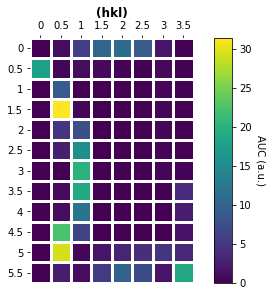

In [13]:
###############
# Heatmaps    #
# D. O'Nolan  #
###############

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
path =r'C:\Users\donolan\Dropbox\Dan_StonyBrook\2019_CambridgeCollaboration\APS_Oct19_HKUST_mapping\d200_Gr\NMF_3C_PDF\\'
os.chdir(path)

vertical = ["0", "0.5", "1", "1.5","2", "2.5", "3","3.5", "4", "4.5","5","5.5"]
horizontal = ["0", "0.5", "1","1.5", "2", "2.5", "3","3.5"]

# (222) d = 1.589
A = np.array([[0.0,267.4,264.6,262.0,6.5,18.5,225.7,270.1],
              [267.4,268.3,265.5,264.4,9.5,24.2,209.7,270.7],
              [0.0,268.6,265.7,266.8,94.4,69.8,215.8,271.3],
              [0.0,268.9,266.3,266.5,223.3,25.8,239.1,271.2],
              [0.0,260.6,267.4,268.5,255.0,11.0,254.9,271.6],
              [0.0,183.9,254.9,253.9,245.2,126.5,267.7,266.1],
              [0.0,0.0,91.5,12.0,1.0,65.4,257.0,243.4],
              [0.0,216.7,137.1,22.8,145.1,134.4,193.7,212.0],
              [0.0,265.6,257.8,0.7,59.8,267.3,265.0,265.0],
              [0.0,264.3,260.3,0.8,267.2,271.3,267.5,264.5],
              [0.0,263.5,261.2,1.2,245.8,269.9,268.2,265.5],
              [0.0,262.3,262.2,3.9,158.9,249.0,269.0,272.0]])

# hkl
B = np.array([[0.0,1.0,5.7,10.3,11.1,9.0,1.9,0.2],
              [18.0,0.6,1.1,0.8,0.3,0.2,0.7,0.2],
              [0.0,9.0,0.0,0.0,0.0,0.1,0.6,0.2],
              [0.0,31.4,0.6,0.0,0.0,0,0.4,0],
              [0.0,4.7,7.7,0.0,0.0,0.0,0.6,0.2],
              [0.0,2.6,15.6,0.0,0.0,0.0,0.3,0.0],
              [0.0,0.0,20.0,0.0,0.0,0,0.6,0.3],
              [0.0,0.9,19.2,0.0,0.0,0.0,0.2,3.7],
              [0.0,1.0,12.1,0.0,0.0,0.0,0.1,2.5],
              [0.0,22.4,6.5,0.0,0.1,0.1,0.0,1.5],
              [0.0,29.3,0.5,1.8,3.2,4.4,4.7,3.5],
              [0.0,2.4,1.0,5.6,9.9,7.0,1.6,18.9]])

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
#    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
#             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center", 
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, ax = plt.subplots(constrained_layout=True)
ax.set_title('(hkl)\n', fontsize=12, fontweight='bold')

im, cbar = heatmap(B, vertical, horizontal,ax=ax,
                   cmap="viridis", cbarlabel="AUC (a.u.)")

plt.savefig('XRD_ML2_unknown-hkl_rescaled.png', bbox_inches='tight', dpi=300)
plt.show()